In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table, vstack
from matplotlib import pyplot as plt
from glob import glob
from astropy.stats import LombScargle
from scipy import stats
import warnings
from TESStools import *

In [2]:
tid = 29984014

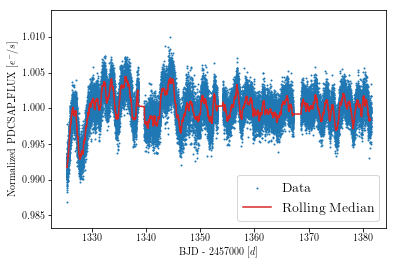

In [3]:
lc, lc_smooth = lc_extract(get_lc_from_id(tid), smooth=128)
plt.scatter(lc['Time'],lc['Flux'],s=1,label='Data')
plt.plot(lc_smooth['Time'],lc_smooth['Flux'],c='C3',label='Rolling Median')
plt.gca().set(xlabel='BJD - 2457000 [$d$]', ylabel='Normalized PDCSAP\_FLUX [$e^-/s$]')
h, l = plt.gca().get_legend_handles_labels()
plt.legend(handles = h[::-1], labels = l[::-1], prop={'size': 14})

/Volumes/shoobert/Research/UW/TESS/code/TESStools.py:104: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(lc['Time'].values,lc['Flux'].values,deg=deg)


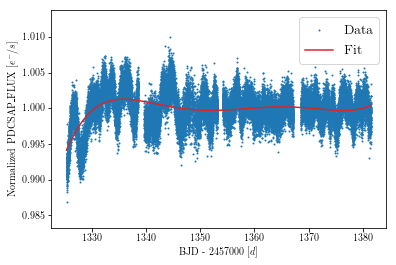

In [12]:
lc, p = polynorm(lc, deg=7)
vals = np.polyval(p, lc['Time'])
plt.scatter(lc['Time'],lc['Flux'],s=1,label='Data')
plt.plot(lc['Time'],vals,c='C3',label='Fit')
plt.gca().set(xlabel='BJD - 2457000 [$d$]', ylabel='Normalized PDCSAP\_FLUX [$e^-/s$]')
h, l = plt.gca().get_legend_handles_labels()
plt.legend(handles = h[::-1], labels = l[::-1], prop={'size': 14})

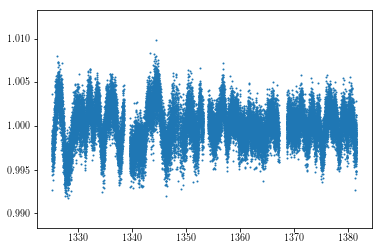

In [13]:
plt.scatter(lc['Time'],lc['NormFlux'],s=1)

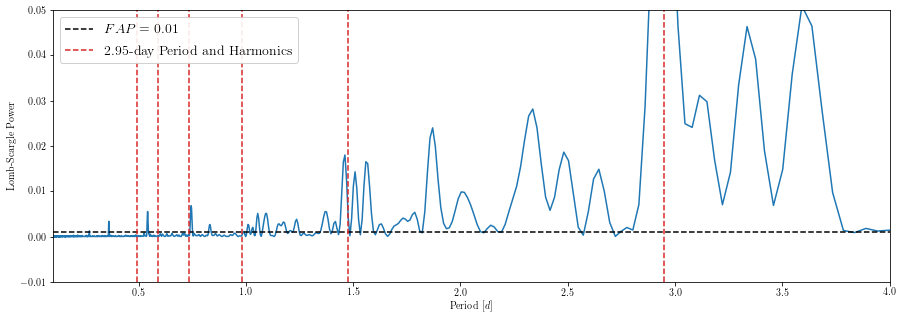

In [20]:
ls = LombScargle(lc['Time'], lc['NormFlux'])
f, p = ls.autopower(minimum_frequency=1.0/4.0,
                    maximum_frequency=1.0/0.1)

fs, ps = peak_finder(f, p, 10, width=10)

dom = fs[np.argmax(ps)]
dp = 1.0/dom

FAL = ls.false_alarm_level(0.01)

fig = plt.figure(figsize=(15,5))

plt.plot(1.0/f,p)
plt.axhline(y=FAL, ls='--', c='k', label='$FAP=0.01$')
plt.axvline(x=1.0/dom, ls='--', c='C3')
plt.axvline(x=1.0/(2.0*dom), ls='--', c='C3')
plt.axvline(x=1.0/(3.0*dom), ls='--', c='C3')
plt.axvline(x=1.0/(4.0*dom), ls='--', c='C3')
plt.axvline(x=1.0/(5.0*dom), ls='--', c='C3')
plt.axvline(x=1.0/(6.0*dom), ls='--', c='C3', label='{0:.2f}-day Period and Harmonics'.format(dp))
plt.legend(loc=2, framealpha=0.9, prop={'size': 14})
plt.gca().set(xlabel='Period [$d$]', ylabel='Lomb-Scargle Power', xlim=(0.1,4), ylim=(-0.01,0.05));

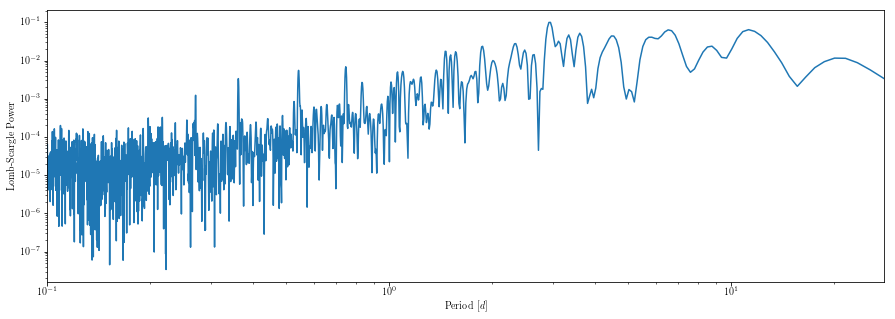

In [23]:
f, p = ls.autopower(minimum_frequency=1.0/28.0,
                    maximum_frequency=1.0/0.1)

fig = plt.figure(figsize=(15,5))
plt.loglog(1.0/f,p)
plt.gca().set(xlabel='Period [$d$]', ylabel='Lomb-Scargle Power', xlim=(0.1,28));